## SBU - MAR 570 - Fall 2019 - D. Wilks Textbook, 3d ed.
### Gui Larangeira
#### Example 10.1

In [19]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import os
import numpy as np
from scipy.linalg import inv, solve, det, norm
from numpy import linalg
import statistics as stats

%pwd

'C:\\Users\\Glarange\\Google Drive\\Stony\\MAR_570'

In [5]:
os.chdir("C:/Users/Glarange/Google Drive/Stony/MAR_570")
%pwd

'C:\\Users\\Glarange\\Google Drive\\Stony\\MAR_570'

In [6]:
df = pd.read_csv("C:/Users/Glarange/Google Drive/Stony/MAR_570/A1.csv")
X = df.drop(df.columns[0], axis=1)
X = X.values
X

array([[ 0.00e+00,  3.30e+01,  1.90e+01,  0.00e+00,  3.40e+01,  2.80e+01],
       [ 7.00e-02,  3.20e+01,  2.50e+01,  4.00e-02,  3.60e+01,  2.80e+01],
       [ 1.11e+00,  3.00e+01,  2.20e+01,  8.40e-01,  3.00e+01,  2.60e+01],
       [ 0.00e+00,  2.90e+01, -1.00e+00,  0.00e+00,  2.90e+01,  1.90e+01],
       [ 0.00e+00,  2.50e+01,  4.00e+00,  0.00e+00,  3.00e+01,  1.60e+01],
       [ 0.00e+00,  3.00e+01,  1.40e+01,  0.00e+00,  3.50e+01,  2.40e+01],
       [ 0.00e+00,  3.70e+01,  2.10e+01,  2.00e-02,  4.40e+01,  2.60e+01],
       [ 4.00e-02,  3.70e+01,  2.20e+01,  5.00e-02,  3.80e+01,  2.40e+01],
       [ 2.00e-02,  2.90e+01,  2.30e+01,  1.00e-02,  3.10e+01,  2.40e+01],
       [ 5.00e-02,  3.00e+01,  2.70e+01,  9.00e-02,  3.30e+01,  2.90e+01],
       [ 3.40e-01,  3.60e+01,  2.90e+01,  1.80e-01,  3.90e+01,  2.90e+01],
       [ 6.00e-02,  3.20e+01,  2.50e+01,  4.00e-02,  3.30e+01,  2.70e+01],
       [ 1.80e-01,  3.30e+01,  2.90e+01,  4.00e-02,  3.40e+01,  3.10e+01],
       [ 2.00e-02,  3.40e

,Ithica precip,Ithica maxT,Ithica minT,Canan precip,Canan maxT,Canan minT
0,0.00,33,19,0.00,34,28
1,0.07,32,25,0.04,36,28
2,1.11,30,22,0.84,30,26
3,0.00,29,-1,0.00,29,19
4,0.00,25,4,0.00,30,16
5,0.00,30,14,0.00,35,24
6,0.00,37,21,0.02,44,26
7,0.04,37,22,0.05,38,24
8,0.02,29,23,0.01,31,24
9,0.05,30,27,0.09,33,29


%COVARIANCE
%Consider the covariance between observations at the two stations in A.1

%Form a data matrix [X] [31x6] where rows are time and columns are obs
X=[Ithicaprecip,IthicamaxT,IthicaminT,Cananprecip,CananmaxT,CananminT];

%Must demean [X] according to 10.4
   Xdm  =    X   -  ones(31) * X/31; %10.29
%[31x6] =  [6x31]  [31x31]   [31x6] 

 %Compute covariance matrix [S] according to 10.30
   S  =    Xdm' *  Xdm/(31-1);
%[6x6]=   [6x31]  [31x6]

% S =
% 
%    5.8994e-02  -4.4452e-02   9.4867e-01   3.9314e-02  -7.5290e-02   4.6662e-01
%   -4.4452e-02   5.9516e+01   7.5433e+01   2.3323e-02   5.8070e+01   5.1697e+01
%    9.4867e-01   7.5433e+01   1.8547e+02   6.1000e-01   8.1633e+01   1.1080e+02
%    3.9314e-02   2.3323e-02   6.1000e-01   2.8106e-02  -1.9935e-02   2.7827e-01
%   -7.5290e-02   5.8070e+01   8.1633e+01  -1.9935e-02   6.1847e+01   5.6119e+01
%    4.6662e-01   5.1697e+01   1.1080e+02   2.7827e-01   5.6119e+01   7.7581e+01


In [7]:
X.shape
ones = np.ones((31,31))

X_dm = X - ones @ X/31

S = X_dm.transpose() @ X_dm/(31-1)
# The Covariance Matrix is
S

array([[ 5.89939785e-02, -4.44516129e-02,  9.48666667e-01,
         3.93143011e-02, -7.52903226e-02,  4.66623656e-01],
       [-4.44516129e-02,  5.95161290e+01,  7.54333333e+01,
         2.33225806e-02,  5.80698925e+01,  5.16967742e+01],
       [ 9.48666667e-01,  7.54333333e+01,  1.85466667e+02,
         6.10000000e-01,  8.16333333e+01,  1.10800000e+02],
       [ 3.93143011e-02,  2.33225806e-02,  6.10000000e-01,
         2.81064516e-02, -1.99354839e-02,  2.78268817e-01],
       [-7.52903226e-02,  5.80698925e+01,  8.16333333e+01,
        -1.99354839e-02,  6.18473118e+01,  5.61193548e+01],
       [ 4.66623656e-01,  5.16967742e+01,  1.10800000e+02,
         2.78268817e-01,  5.61193548e+01,  7.75806452e+01]])

#### Example 12.1

In [122]:
x_1 = X[:,2] 
x_2 = X[:,5]
# de-mean
xp_1 = x_1 - stats.mean(x_1)
xp_2 = x_2 - stats. mean(x_2)
xp = np.column_stack((xp_1,xp_2))

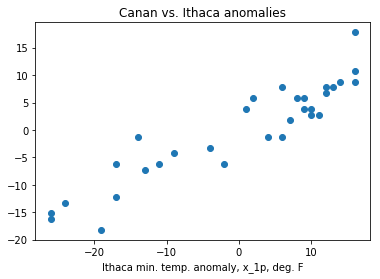

In [141]:
fig1, ax1 = plt.subplots()
ax1.set_title("Canan vs. Ithaca anomalies")
ax1.set_xlabel("Ithaca min. temp. anomaly, x_1p, deg. F")
plt.scatter(xp_1,xp_2)

In [140]:
d = xp.shape[0]
ones = np.ones((d,d))

xt = xp - ones @ xp/d

St = xt.transpose() @ xt/(d-1)
# The Covariance Matrix is
St

array([[185.46666667, 110.8       ],
       [110.8       ,  77.58064516]])

In [188]:
e = linalg.eig(St)
ev = e[0]
eigval_1 = ev[0]
eigval_2 = ev[1]
eigvec = e[1]
e_1 = eigvec[:,0]
e_2 = eigvec[:,1]
u = eigvec.transpose() @ xp.transpose()
e

(array([254.75712705,   8.29018477]), array([[ 0.84785912, -0.53022156],
        [ 0.53022156,  0.84785912]]))

In [183]:
print(eigval_1/(eigval_1 + eigval_2))
print(u.shape)

0.9684840543818084
(2, 31)


In [184]:
t = np.arange(1,32)
xpr_1 = e_1[0] * u[0] 
xpr_2 = e_1[1] * u[0]

(-30, 30)

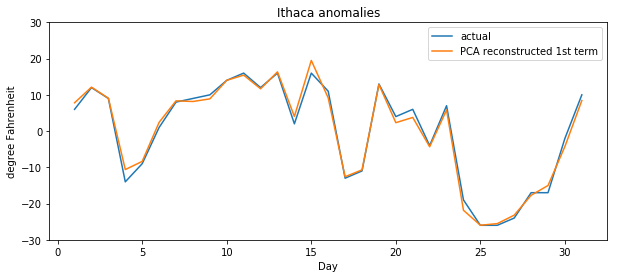

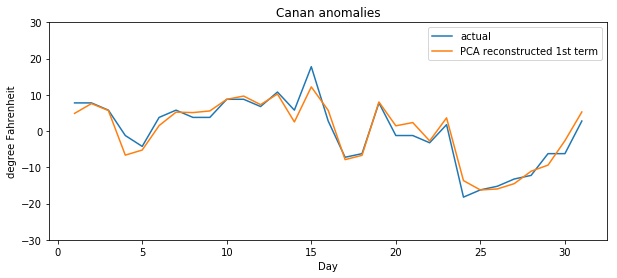

In [187]:
#plt.plot(XT_p1)
fig2, ax2 = plt.subplots(figsize=(10,4))

ax2.set_title("Ithaca anomalies")
ax2.set_xlabel("Day")
ax2.set_ylabel("degree Fahrenheit")
ax2.plot(t, xp_1, label = 'actual')
ax2.plot(t, xpr_1, label = 'PCA reconstructed 1st term')
ax2.legend()
plt.ylim(-30,30)
fig3, ax3 = plt.subplots(figsize=(10,4))
ax3.set_title("Canan anomalies")
ax3.set_xlabel("Day")
ax3.set_ylabel("degree Fahrenheit")
ax3.plot(t, xp_2, label = 'actual')
ax3.plot(t, xpr_2, label = 'PCA reconstructed 1st term')
ax3.legend()
plt.ylim(-30,30)

In [196]:
from scipy.stats.stats import pearsonr  
print(round(pearsonr(xp_1,xpr_1)[0],3))
print(round(pearsonr(xp_2,xpr_2)[0],3))

0.994
0.961
